# Analysis of $N_2$ in a static electric field

We consider a $N_2$ molecule in a static electric field. We present results for fields both directed in the z (axial) and in the x directions. 

The main aim of this analysis is to determine the minimum dimension allowed of the simulation box as a function of the field intensity. As a criterium of consistency we require that the energy of the occupied KS orbitals should remain constant as the dimension of the box is increased.  

In [2]:
from BigDFT import Logfiles as lf
from futile import Yaml
import matplotlib.pyplot as plt
inputpath = 'input/'
outputpath = '../log/'

First of all we define the python dictionary that contains the basic keys common to all the file in the run

In [3]:
inp0 = {'dft' : 
        {'hgrids': 0.4,
         'itermax' : 100},
        'posinp': 'N2_posinp.xyz'}

and we these common variables in the default file (named "default.yaml" according to BigDFT specification):

In [4]:
Yaml.dump(inp0,inputpath + 'default.yaml')

We perform the analysis for different values of the field norm.

# $E$-norm = $1e^{-4}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [5]:
enorm = 1e-4
en = str('1em4_')

In [6]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [7]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [8]:
rmult = [[float(i), 9.0] for i in range(7,10)]
rmult

[[7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [9]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

We execute the single file with the command:

OMP_NUM_THREADS=1 mpirun -np 6 $BIGDFT_ROOT/bigdft -d ../log/ -n namefile

or the sequence of file in the runs as:

OMP_NUM_THREADS=1 mpirun -np 6 $BIGDFT_ROOT/bigdft -d ../log/ -r runs_en

if we want to not run again the runs already performed the command is as:

OMP_NUM_THREADS=1 mpirun -np 6 $BIGDFT_ROOT/bigdft -d ../log/ -r runs_en -s yes

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [10]:
logsEx = !ls log/log-Ex_1em4*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em4*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em4_rmult_7.0.yaml', 'log/log-Ex_1em4_rmult_8.0.yaml', 'log/log-Ex_1em4_rmult_9.0.yaml']
['log/log-Ez_1em4_rmult_7.0.yaml', 'log/log-Ez_1em4_rmult_8.0.yaml', 'log/log-Ez_1em4_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [11]:
Ez[0].evals[0][0]

BandArray([-1.03253096, -0.49763623, -0.43147406, -0.43147406, -0.38199635])

The number of orbitals is given by

In [12]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [13]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [14]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

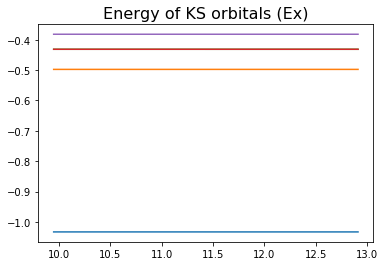

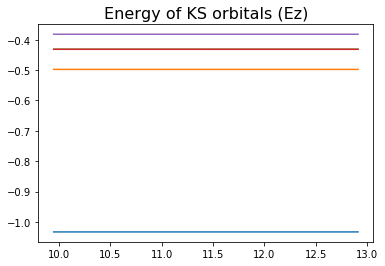

In [15]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

# $E$-norm = $1e^{-3}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [16]:
enorm = 1e-3
en = str('1em3_')

In [17]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [18]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [19]:
rmult = [[float(i), 9.0] for i in range(4,10)]
rmult

[[4.0, 9.0], [5.0, 9.0], [6.0, 9.0], [7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [20]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [21]:
logsEx = !ls log/log-Ex_1em3*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em3*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em3_rmult_4.0.yaml', 'log/log-Ex_1em3_rmult_5.0.yaml', 'log/log-Ex_1em3_rmult_6.0.yaml', 'log/log-Ex_1em3_rmult_7.0.yaml', 'log/log-Ex_1em3_rmult_8.0.yaml', 'log/log-Ex_1em3_rmult_9.0.yaml']
['log/log-Ez_1em3_rmult_4.0.yaml', 'log/log-Ez_1em3_rmult_5.0.yaml', 'log/log-Ez_1em3_rmult_6.0.yaml', 'log/log-Ez_1em3_rmult_7.0.yaml', 'log/log-Ez_1em3_rmult_8.0.yaml', 'log/log-Ez_1em3_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [22]:
Ez[0].evals[0][0]

BandArray([-1.02650501, -0.4921193 , -0.42574634, -0.425744  , -0.37584628])

 The number of orbitals is given by:

In [23]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [24]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [25]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

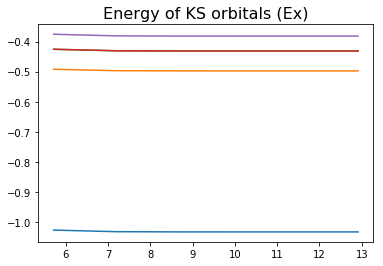

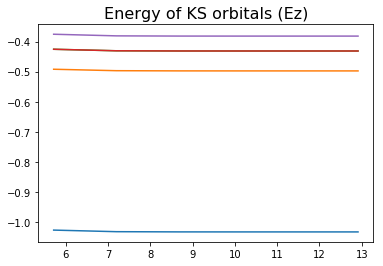

In [26]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

We also plot the difference between the energy of each orbital and its value for the greatest simulation box

In [27]:
deltaEx=[]
for orb in range(norb):
    delta = enEx[orb]-enEx[orb][nRunEx-1]
    deltaEx.append(delta)
    
deltaEz=[]
for orb in range(norb):
    delta = enEz[orb]-enEz[orb][nRunEz-1]
    deltaEz.append(delta)

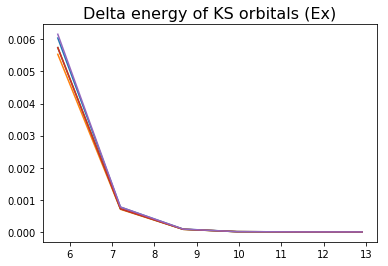

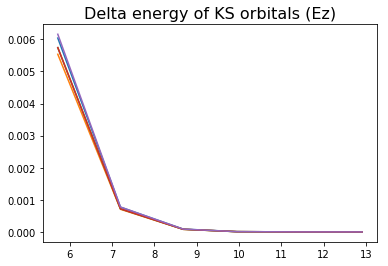

In [28]:
for orb in range(norb):
    plt.plot(dimBoxEx,deltaEx[orb])
plt.title('Delta energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,deltaEz[orb])
plt.title('Delta energy of KS orbitals (Ez)',fontsize=16)
plt.show()

# $E$-norm = $1e^{-2}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [29]:
enorm = 1e-2
en = str('1em2_')

In [30]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [31]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [32]:
rmult = [[float(i), 9.0] for i in range(4,10)]
rmult

[[4.0, 9.0], [5.0, 9.0], [6.0, 9.0], [7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [33]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [34]:
logsEx = !ls log/log-Ex_1em2*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em2*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em2_rmult_4.0.yaml', 'log/log-Ex_1em2_rmult_5.0.yaml', 'log/log-Ex_1em2_rmult_6.0.yaml', 'log/log-Ex_1em2_rmult_7.0.yaml', 'log/log-Ex_1em2_rmult_8.0.yaml', 'log/log-Ex_1em2_rmult_9.0.yaml']
['log/log-Ez_1em2_rmult_4.0.yaml', 'log/log-Ez_1em2_rmult_5.0.yaml', 'log/log-Ez_1em2_rmult_6.0.yaml', 'log/log-Ez_1em2_rmult_7.0.yaml', 'log/log-Ez_1em2_rmult_8.0.yaml', 'log/log-Ez_1em2_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [35]:
Ez[0].evals[0][0]

BandArray([-1.02650501, -0.4921193 , -0.42574634, -0.425744  , -0.37584628])

 The number of orbitals is given by:

In [36]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [37]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [38]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

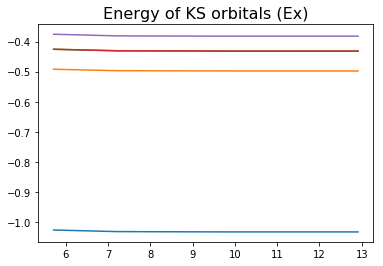

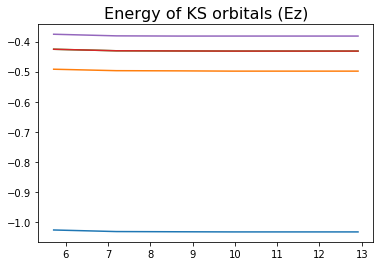

In [39]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

We also plot the difference between the energy of each orbital and its value for the greatest simulation box

In [40]:
deltaEx=[]
for orb in range(norb):
    delta = enEx[orb]-enEx[orb][nRunEx-1]
    deltaEx.append(delta)
    
deltaEz=[]
for orb in range(norb):
    delta = enEz[orb]-enEz[orb][nRunEz-1]
    deltaEz.append(delta)

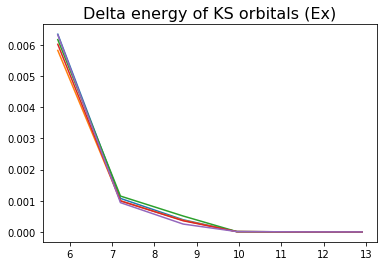

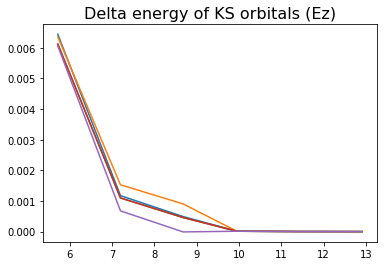

In [41]:
for orb in range(norb):
    plt.plot(dimBoxEx,deltaEx[orb])
plt.title('Delta energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,deltaEz[orb])
plt.title('Delta energy of KS orbitals (Ez)',fontsize=16)
plt.show()

# $E$-norm = $1e^{-1}$

## Set up of the simulations

We build a set of input files with increasing values of the box dimension for both the x and z electric field configurations. 

In [42]:
enorm = 1e-1
en = str('1em1_')

In [43]:
ez=[0.0,0.0,enorm]
ex=[enorm,0.0,0.0]

In [44]:
inpEz={'dft':{'elecfield': ez}}
inpEx={'dft':{'elecfield': ex}}

In [45]:
rmult = [[float(i), 9.0] for i in range(4,10)]
rmult

[[4.0, 9.0], [5.0, 9.0], [6.0, 9.0], [7.0, 9.0], [8.0, 9.0], [9.0, 9.0]]

In [46]:
lrun=[]
for r in rmult:
    inpEz['dft']['rmult'] = r
    inpEx['dft']['rmult'] = r
    inpnameEz = 'Ez_'+en+str('rmult_')+str(r[0])
    inpnameEx = 'Ex_'+en+str('rmult_')+str(r[0])
    Yaml.dump(inpEz,inputpath + inpnameEz + '.yaml')
    Yaml.dump(inpEx,inputpath + inpnameEx + '.yaml')
    lrun.append(inpnameEz)
    lrun.append(inpnameEx)
Yaml.dump(lrun,inputpath+'runs_'+en)

## Data analysis

Now we plot the energy of the KS orbitals as a function of the dimension of the box. We import the log files with the results of the simulations:

In [47]:
logsEx = !ls log/log-Ex_1em1*
Ex=[lf.Logfile(l) for l in logsEx]
nRunEx=len(Ex)
print(logsEx)

logsEz = !ls log/log-Ez_1em1*
Ez=[lf.Logfile(l) for l in logsEz]
nRunEz=len(Ez)
print(logsEz)

['log/log-Ex_1em1_rmult_4.0.yaml', 'log/log-Ex_1em1_rmult_5.0.yaml', 'log/log-Ex_1em1_rmult_6.0.yaml', 'log/log-Ex_1em1_rmult_7.0.yaml', 'log/log-Ex_1em1_rmult_8.0.yaml', 'log/log-Ex_1em1_rmult_9.0.yaml']
['log/log-Ez_1em1_rmult_4.0.yaml', 'log/log-Ez_1em1_rmult_5.0.yaml', 'log/log-Ez_1em1_rmult_6.0.yaml', 'log/log-Ez_1em1_rmult_7.0.yaml', 'log/log-Ez_1em1_rmult_8.0.yaml', 'log/log-Ez_1em1_rmult_9.0.yaml']


for each run i the lists Ex[i].evals[0][0] and Ez[i].evals[0][0] contain the energy of the orbitals, for instance:

In [48]:
Ez[0].evals[0][0]

BandArray([-1.05596089, -0.55331142, -0.45380212, -0.45379978, -0.36699289])

 The number of orbitals is given by:

In [49]:
norb =len(Ex[0].evals[0][0])

we introduce the lists enEx[i], enEz[i] (with i in range(norb)) that contains the energy of the i-th orbital for
all the runs

In [50]:
enEx=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ex[run].evals[0][0][orb])
    enEx.append(eorb)

enEz=[]
for orb in range(norb):
    eorb=[]
    for run in range(nRunEx):
        eorb.append(Ez[run].evals[0][0][orb])
    enEz.append(eorb)

In [51]:
dimBoxEx=[]
dimBoxEz=[]
for ind in range(nRunEx):
    dimBoxEx.append(Ex[ind].log['Sizes of the simulation domain']['Angstroem'][0])
    dimBoxEz.append(Ez[ind].log['Sizes of the simulation domain']['Angstroem'][0])

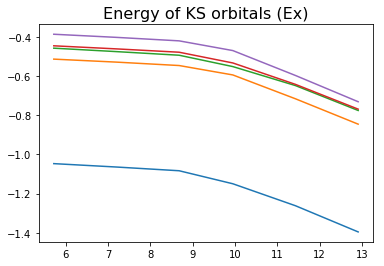

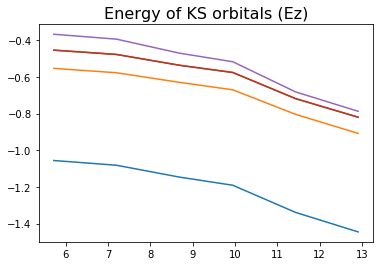

In [52]:
for orb in range(norb):
    plt.plot(dimBoxEx,enEx[orb])
plt.title('Energy of KS orbitals (Ex)',fontsize=16)
plt.show()

for orb in range(norb):
    plt.plot(dimBoxEz,enEz[orb])
plt.title('Energy of KS orbitals (Ez)',fontsize=16)
plt.show()

In this case we observe that the self consistent cicles stop at itermax, so probabibly the system is not converging